# installing useful packages 

# Pandas

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# hmmlearn

In [2]:
pip install hmmlearn

     -------------------------------------- 123.8/123.8 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# PyStruct

In [3]:
pip install pystruct

     ---------------------------------------- 5.6/5.6 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error in pystruct setup command: use_2to3 is invalid.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# CVXOPT

In [4]:
pip install cvxopt

     ---------------------------------------- 12.8/12.8 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Handling time series data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

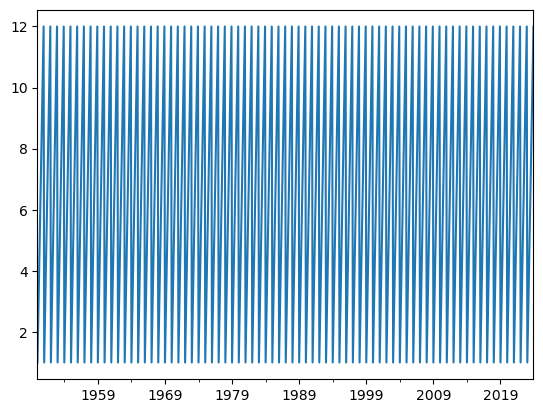

In [7]:
def read_data(input_file,index):  #adding index arrgument in the read_data
    input_data = np.loadtxt(input_file, delimiter = None)
    dates = pd.date_range('1950-01',periods = input_data.shape[0], freq = 'M')
    output = pd.Series(input_data[:, index], index = dates)	
    return output

if __name__=='__main__': 
        input_file = r"Three"
        index_to_use = 1 # Replace 1 with the actual index you want to use example given below
        timeseries = read_data(input_file, index_to_use)
        plt.figure()
        timeseries.plot()
        plt.show()





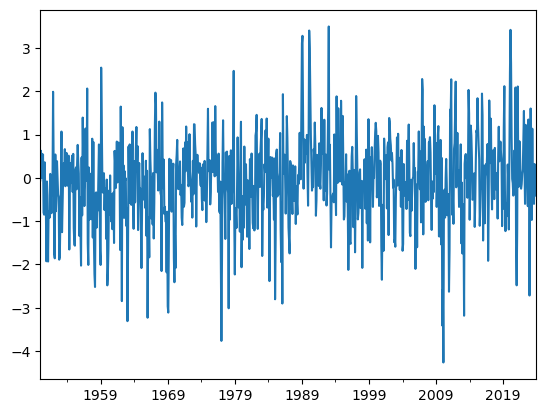

In [8]:
def read_data(input_file,index):  #adding index arrgument in the read_data
    input_data = np.loadtxt(input_file, delimiter = None)
    dates = pd.date_range('1950-01',periods = input_data.shape[0], freq = 'M')
    output = pd.Series(input_data[:, index], index = dates)	
    return output

if __name__=='__main__': 
        input_file = r"Three"
        index_to_use = 2
        timeseries = read_data(input_file, index_to_use)
        plt.figure()
        timeseries.plot()
        plt.show()





 # slicing time series data

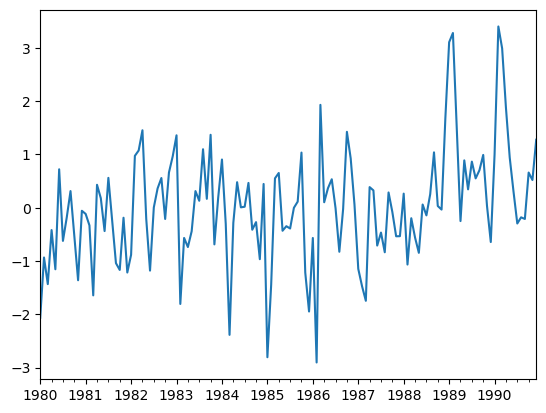

In [9]:
def read_data(input_file,index):  #adding index arrgument in the read_data
    input_data = np.loadtxt(input_file, delimiter = None)
    dates = pd.date_range('1950-01',periods = input_data.shape[0], freq = 'M')
    output = pd.Series(input_data[:, index], index = dates)	
    return output

if __name__=='__main__': 
        input_file = r"Three"
        index_to_use = 2 
        timeseries = read_data(input_file, index_to_use)
        plt.figure()
        timeseries['1980':'1990'].plot() #changes done here
        plt.show()



# Extracting Statistic from Time Series Data

# Mean

In [10]:
timeseries.mean()

-0.09014087837837836

# Maximum

In [11]:
timeseries.max()

3.4953

# Minimum

In [12]:
timeseries.min()

-4.2657

# getting everything at once

In [13]:
timeseries.describe()

count    888.000000
mean      -0.090141
std        1.012175
min       -4.265700
25%       -0.628600
50%       -0.039950
75%        0.494675
max        3.495300
dtype: float64

# Re-Sampling

# Re-sampling with mean()

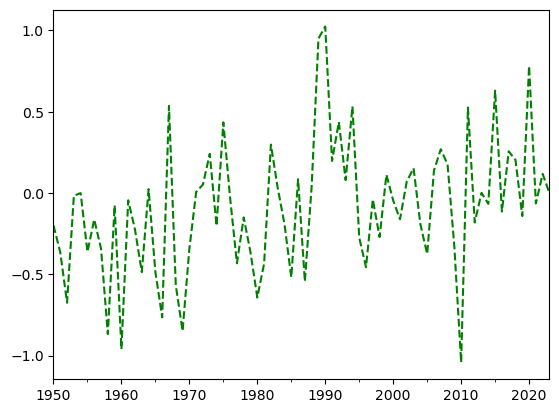

In [14]:
timeseries_mm = timeseries.resample("A").mean()
timeseries_mm.plot(style = 'g--')
plt.show()

# Re-sampling with median()

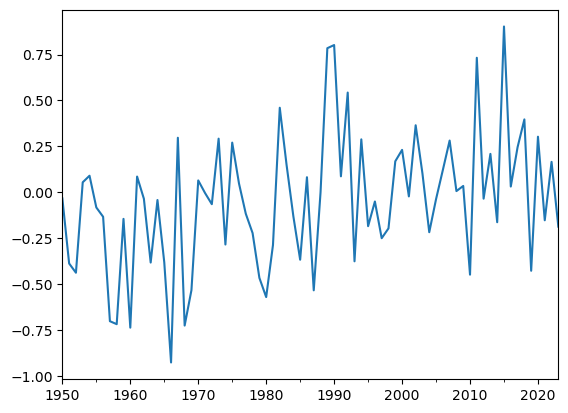

In [15]:
timeseries_nn = timeseries.resample("A").median()
timeseries_nn.plot()
plt.show()

# Rolling Mean

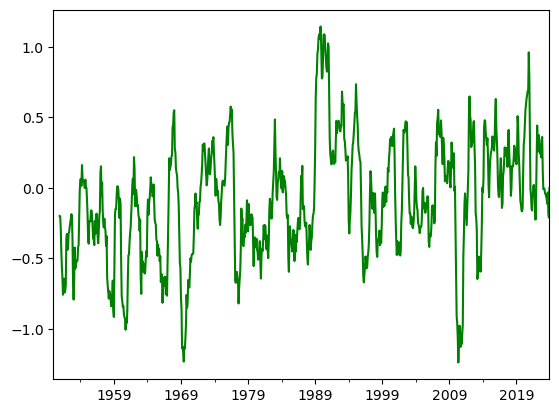

In [16]:
timeseries.rolling(window = 12,center = False).mean().plot(style = '-g')
plt.show()

# Analyzing Sequential Data by Hidden Markov Model (HMM)

# Hidden Markov Model(HMM)

# Mathematically, HMM consists of the following variables −

# States (S)
# It is a set of hidden or latent states present in a HMM. It is denoted by S.

# Output symbols (O)
# It is a set of possible output symbols present in a HMM. It is denoted by O.

# State Transition Probability Matrix (A)
# It is the probability of making transition from one state to each of the other states. It is denoted by A.

# Observation Emission Probability Matrix (B)
# It is the probability of emitting/observing a symbol at a particular state. It is denoted by B.

# Prior Probability Matrix (Π)
# It is the probability of starting at a particular state from various states of the system. It is denoted by Π.

# Hence, a HMM may be defined as 𝝀 = (S,O,A,B,𝝅),

# Example: Analysis of stock market data

In [26]:
pip install yfinance

     ---------------------------------------- 72.4/72.4 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=118e48695f2977d54cef3e48b121af87be450d2c3ed062d9d54cca635b69bd7e
  Stored in directory: c:\users\91997\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5a586c8
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [44]:
import datetime
import numpy as np
import yfinance as yf
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt


In [45]:
# Load stock market data using yfinance
start_date = "1995-10-10"
end_date = "2015-04-25"
quotes = yf.download("INTC", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [46]:

# Extract closing quotes and volumes
closing_quotes = np.array(quotes['Close'])
volumes = np.array(quotes['Volume'])[1:]


In [47]:

# Take the percentage difference of closing stock prices
diff_percentages = 100.0 * np.diff(closing_quotes) / closing_quotes[:-1]
dates = np.array(quotes.index, dtype=int)[1:]
training_data = np.column_stack([diff_percentages, volumes])


In [48]:

# Create and train the Gaussian HMM
hmm = GaussianHMM(n_components=7, covariance_type='diag', n_iter=1000)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    hmm.fit(training_data)



In [49]:
# Generate data using the HMM model
num_samples = 300
samples, _ = hmm.sample(num_samples)



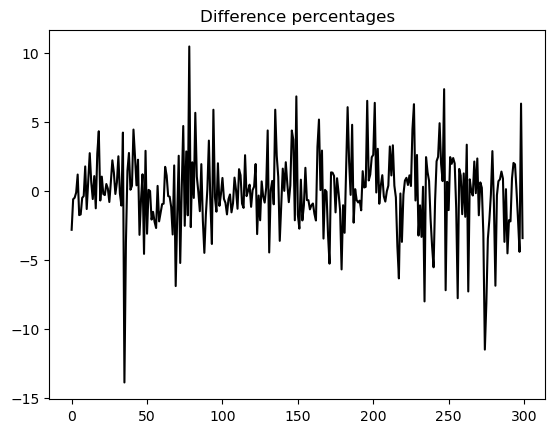

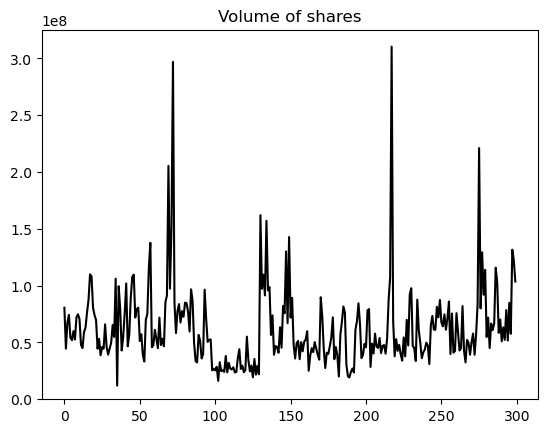

In [50]:
# Plot and visualize the difference percentages
plt.figure()
plt.title('Difference percentages')
plt.plot(np.arange(num_samples), samples[:, 0], c='black')

# Plot and visualize the volume of shares traded
plt.figure()
plt.title('Volume of shares')
plt.plot(np.arange(num_samples), samples[:, 1], c='black')
plt.ylim(ymin=0)
plt.show()